In [52]:
#로지스틱 회귀로 와인분류
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [53]:
wine.head()
#'class'=종속변수 
#0=red, 1=white

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [54]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [55]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [56]:
# 독립변수간 스케일이 다르므로 표준화
# 그전에 데이터 프레임을 넘파이 배열로 바꿔줌

In [64]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [65]:
data,target

(array([[ 9.4 ,  1.9 ,  3.51],
        [ 9.8 ,  2.6 ,  3.2 ],
        [ 9.8 ,  2.3 ,  3.26],
        ...,
        [ 9.4 ,  1.2 ,  2.99],
        [12.8 ,  1.1 ,  3.34],
        [11.8 ,  0.8 ,  3.26]]),
 array([0., 0., 0., ..., 1., 1., 1.]))

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(data,target,test_size=0.2,random_state=42)

In [67]:
X_train.shape,X_test.shape

((5197, 3), (1300, 3))

In [70]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(X_train)
train_scaled=ss.transform(X_train)
test_scaled=ss.transform(X_test)

In [74]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_scaled,y_train)
print(lr.score(train_scaled,y_train))

0.7808350971714451


In [75]:
#위는 점수가 낮으므로 학습이 제대로 되지않음.
#화이트와 레드와인의 구분이 잘 안됨

In [76]:
#결정트리 사용(표준화가 필요없다)
#도메인 지식이 없는 사람들에게 설명하기 용이함

In [91]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_scaled,y_train)
dt.score(train_scaled,y_train),dt.score(test_scaled,y_test)

(0.8454877814123533, 0.8415384615384616)

In [80]:
# 로지스틱회귀보다는 점수가 올랐지만 과대적합

In [84]:
import warnings
warnings.filterwarnings("ignore")
!pip install graphviz

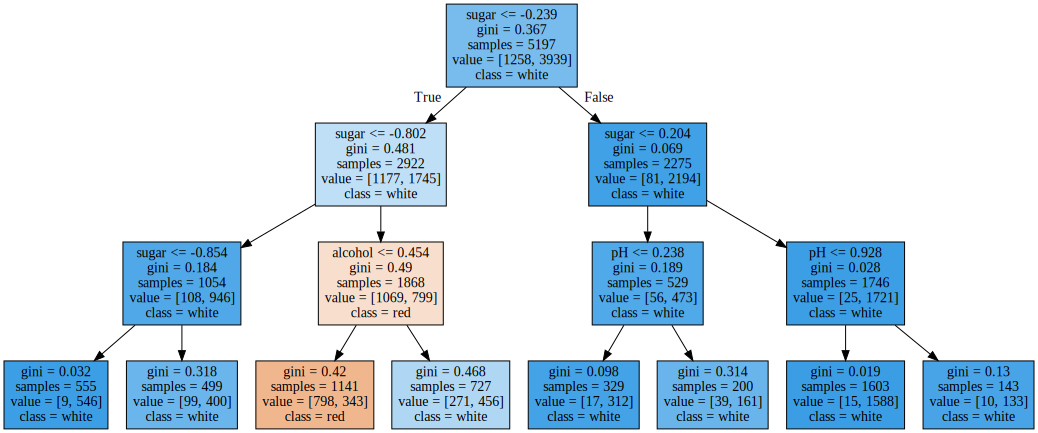

In [92]:
from sklearn.tree import export_graphviz
import graphviz

dot_graph = export_graphviz(dt, out_file=None,
                class_names=['red','white'],
                feature_names=['alcohol','sugar','pH'],
                filled=True)
display( graphviz.Source(dot_graph) )

In [93]:
dt=DecisionTreeClassifier(max_depth=3,random_state=42) #전처리가 필요없으므로 scaled사용x
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

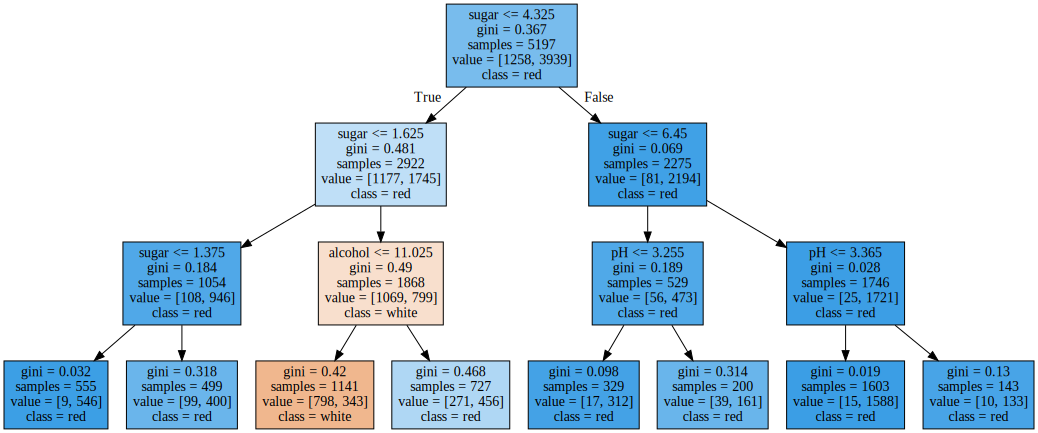

In [97]:
dot_graph=export_graphviz(dt,out_file=None,
                class_names=['white','red'],
                feature_names=['alcohol','sugar','pH'],
                filled=True)

display(graphviz.Source(dot_graph))

In [99]:
#당도<-알코올도수<-pH순, 특성중요도
dt.feature_importances_


array([0.12345626, 0.86862934, 0.0079144 ])